### Context
- Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

- People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

### Heart Disease Prediction with Artificial Neural Networks
**Part 1 - Data Preprocessing**
   - Importing libraries
   - Importing the dataset
   - Dataset information (Pandas Profiling)
   - Spliting the Train & Test datasets
   - Feature Scaling

**Part 2 - Building the ANN**
  - Initializing the ANN
  - Adding the input layer and the first hidden layer
  - Adding the second hidden layer
  - Adding the output layer

**Part 3 - Training the ANN**
  - Compiling the ANN
  - Training the ANN on the Training set

**Part 4 - Making the predictions and evaluating the model**
- Predicting the Test set results
- Making the Confusion Matrix

**To Predict whether a person will have Heart Failure or not on the basis of varoius parameters.**

In [1]:
#Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Exploring tha Dataset**

In [3]:
df.shape

(918, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
categorical =[]
continuous =[]
check =[]

d_types = dict(df.dtypes)
for name, type in d_types.items():
    if str(type) == 'object':
        categorical.append(name)
    elif str(type) == 'float64':
        continuous.append(name)
    else:
        check.append(name)
print('Categorical Features:', categorical)   
print('Continuous Features:', continuous)   
print('Features to be Checked:', check)  

Categorical Features: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Continuous Features: ['Oldpeak']
Features to be Checked: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'HeartDisease']


- Age: age of the patient in years

- Sex: sex of the patient
    * M: Male
    * F: Female

- ChestPainType: chest pain type
    * TA: Typical Angina
    * ATA: Atypical Angina
    * NAP: Non-Anginal Pain
    * ASY: Asymptomatic

- RestingBP: resting blood pressure in mmHg
- Cholesterol: serum cholesterol in mm/dl

- FastingBS: fasting blood sugar
    * 1: if FastingBS > 120 mg/dl, 0: otherwise

- RestingECG: resting electrocardiogram results
    * Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 
    * LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria

- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

- : exercise-induced angina
    * Y: Yes,N: No
- Oldpeak: oldpeak = ST Numeric value measured in depression
- ST_Slope: the slope of the peak exercise ST segment
    * : upsloping
    * Flat: flat
    * Down: downsloping

- HeartDisease: output class
    * 1: heart disease
    * 0: Normal

- Angina is a  type of chest pain caused by reduced blood flow to the heart.

In [7]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [8]:
#cHECKING FOR MISSING VALUES
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

- This dataset doesn.t contain any missing values.

In [9]:
#STATISTICAL MEASURE ABOUT THA DATA
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


- continous =[Age, RestingBP, Cholestrol, MaxHR, Oldpeak]
- categorical = [Sex, ChestPainType, RestingECG, ExerciseAngina,ST_Slope, FastingBS]

## EDA
- **Univariate Analysis**

In [10]:
df['HeartDisease'].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

In [11]:
df['ChestPainType'].value_counts(normalize=True)*100

ASY    54.030501
NAP    22.113290
ATA    18.845316
TA      5.010893
Name: ChestPainType, dtype: float64

In [12]:
df['RestingECG'].value_counts(normalize=True)

Normal    0.601307
LVH       0.204793
ST        0.193900
Name: RestingECG, dtype: float64

In [13]:
df['ExerciseAngina'].value_counts(normalize=True)

N    0.595861
Y    0.404139
Name: ExerciseAngina, dtype: float64

In [14]:
df['ST_Slope'].value_counts(normalize=True)

Flat    0.501089
Up      0.430283
Down    0.068627
Name: ST_Slope, dtype: float64

In [15]:
df['FastingBS'].value_counts(normalize=True)

0    0.766885
1    0.233115
Name: FastingBS, dtype: float64

In [16]:
df['Sex'].value_counts(normalize=True)

M    0.78976
F    0.21024
Name: Sex, dtype: float64

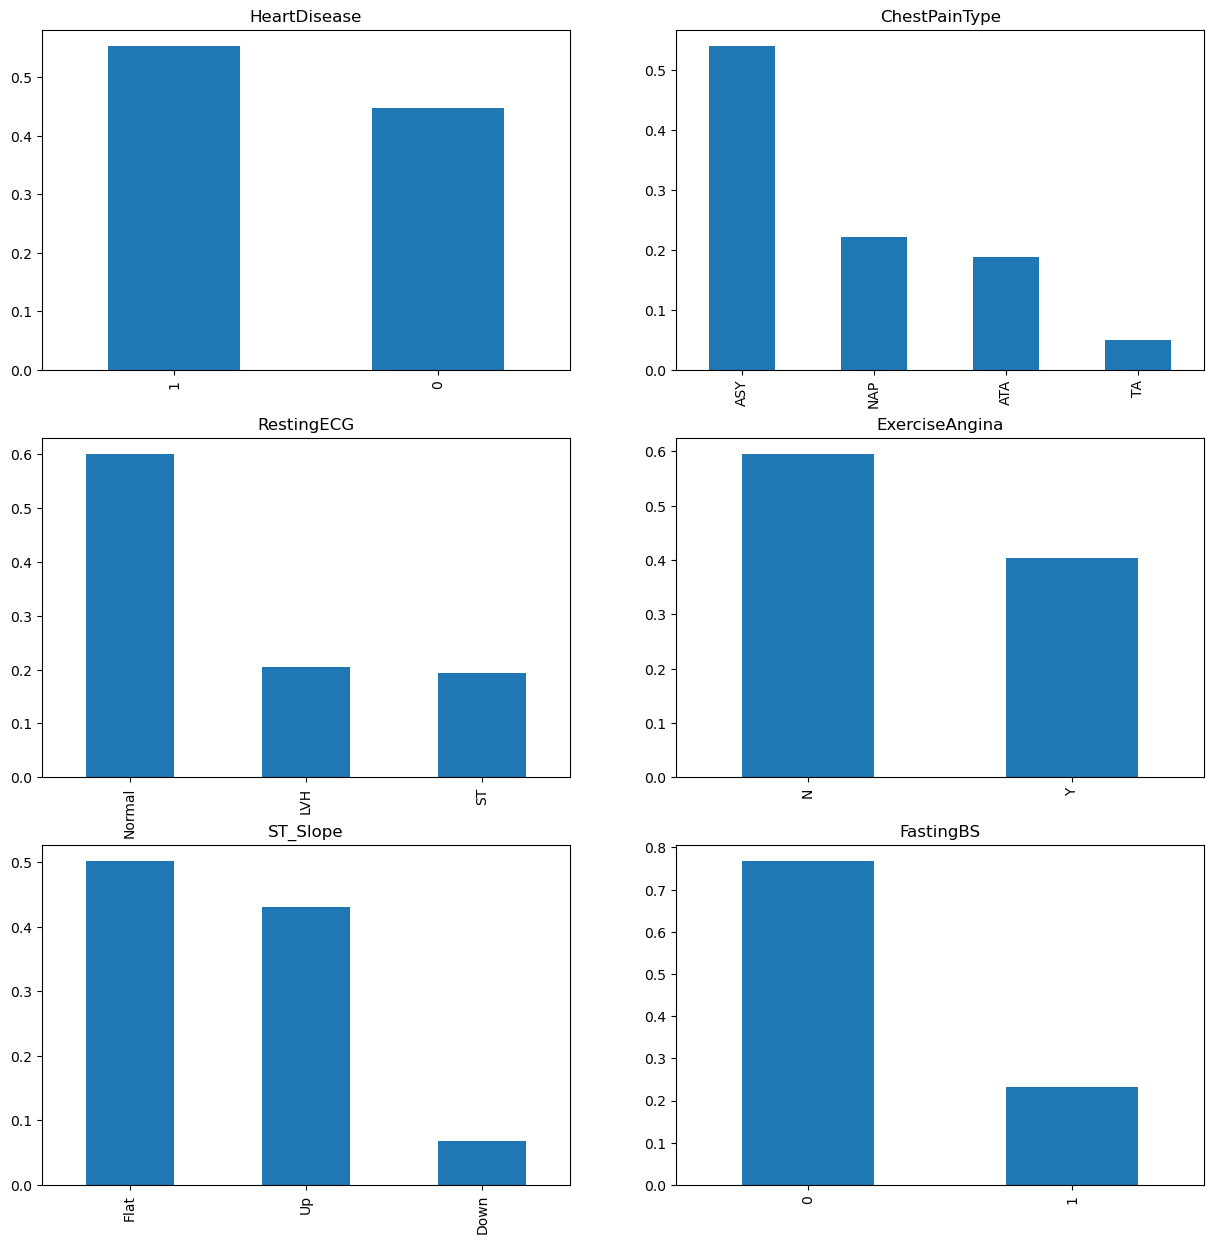

In [17]:
#Creating different bar charts on one image using subplots() function.
plt.figure(figsize=(15,15))

plt.subplot(3,2,1) 
df['HeartDisease'].value_counts(normalize=True).plot.bar()
plt.title("HeartDisease")

plt.subplot(3,2,2)
df['ChestPainType'].value_counts(normalize=True).plot.bar()
plt.title("ChestPainType")

plt.subplot(3,2,3)
df['RestingECG'].value_counts(normalize=True).plot.bar()
plt.title("RestingECG")

plt.subplot(3,2,4)
df['ExerciseAngina'].value_counts(normalize=True).plot.bar()
plt.title("ExerciseAngina")

plt.subplot(3,2,5)
df['ST_Slope'].value_counts(normalize=True).plot.bar()
plt.title("ST_Slope")

plt.subplot(3,2,6)
df['FastingBS'].value_counts(normalize=True).plot.bar()
plt.title("FastingBS")

#Displaying the Chart.
plt.show()

- About 55.55% of people have the  HeartAttack
- About 54% people are havins Aysmototic ChestPain.
- About 60% of people RestingECG is Normal.
- About 60% people are not having ExerciseAngina.
- Most of the people are having ST_Slope of either Flat or UP and very low no of people are having ST_Slope of down.
- About 77% People are FastingBS i.e fasting BloodPresssure,120.
- Apparantly male are having higher chance of HeartFailur as comapre to Female.

**Analysis on Numerical Variable**

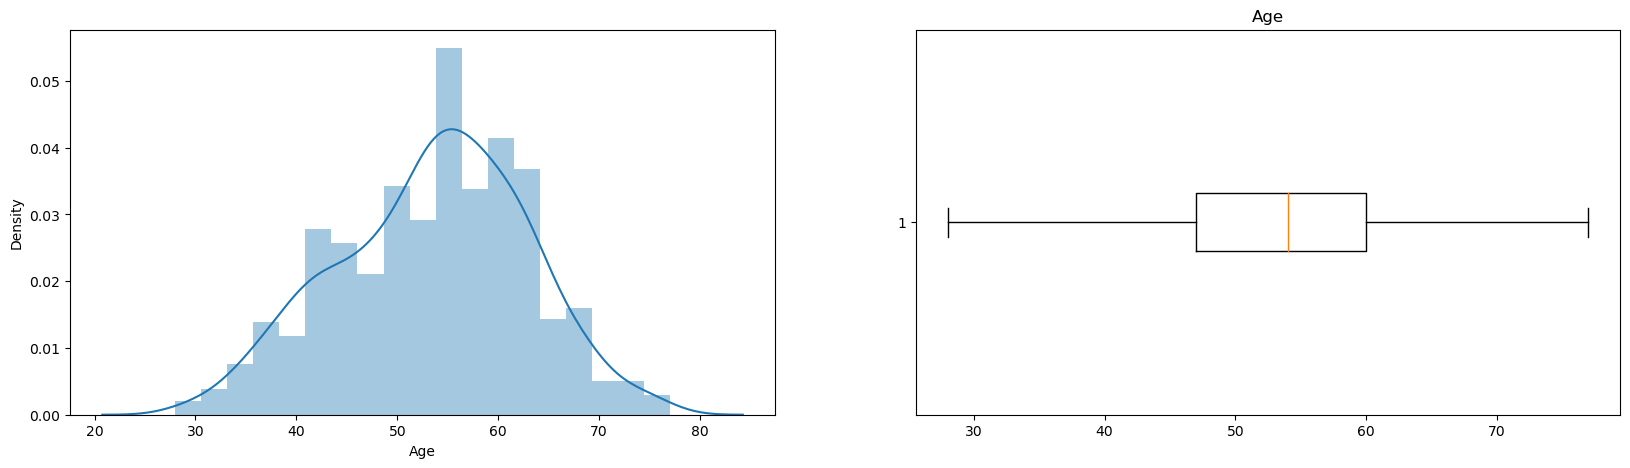

In [18]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot(df['Age'])

plt.subplot(1,2,2)
plt.boxplot(df['Age'], vert=False)
plt.title('Age')

plt.show()

In [19]:
df['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

**Age**: We see how the risk of suffering from  cardiovascular diseases (CVDs) increases with age and is more in age b/w 50 to 70.

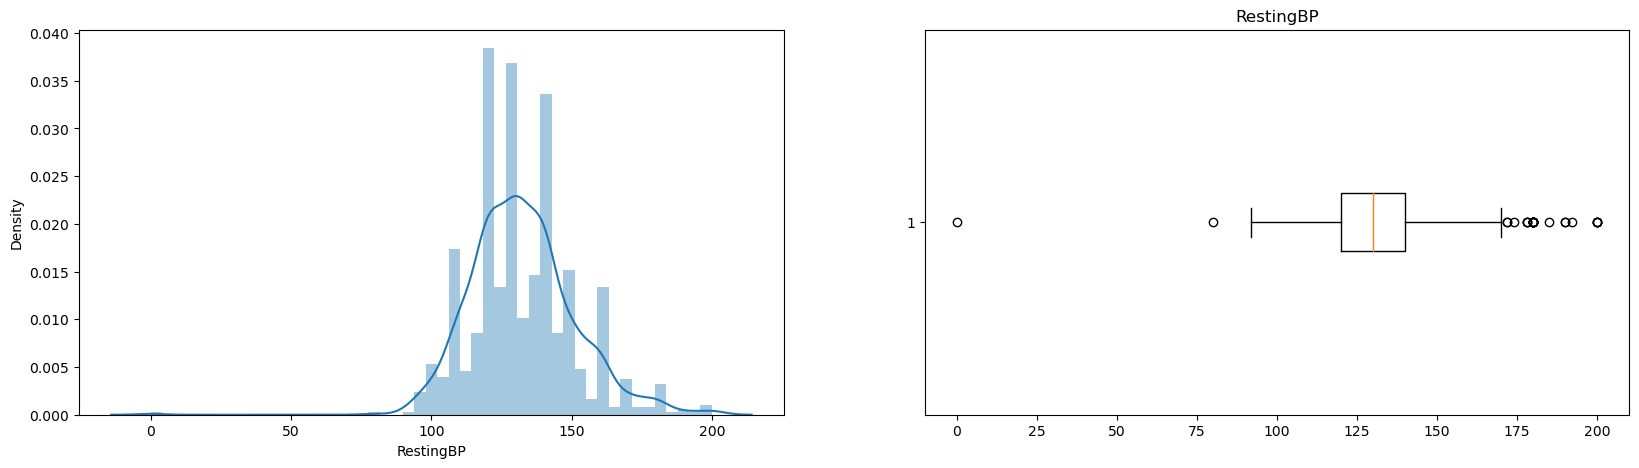

In [20]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot(df['RestingBP'])

plt.subplot(1,2,2)
plt.boxplot(df['RestingBP'], vert=False)
plt.title('RestingBP')

plt.show()

- Most of the patient, RestingBP are in b/w 120 to 150.

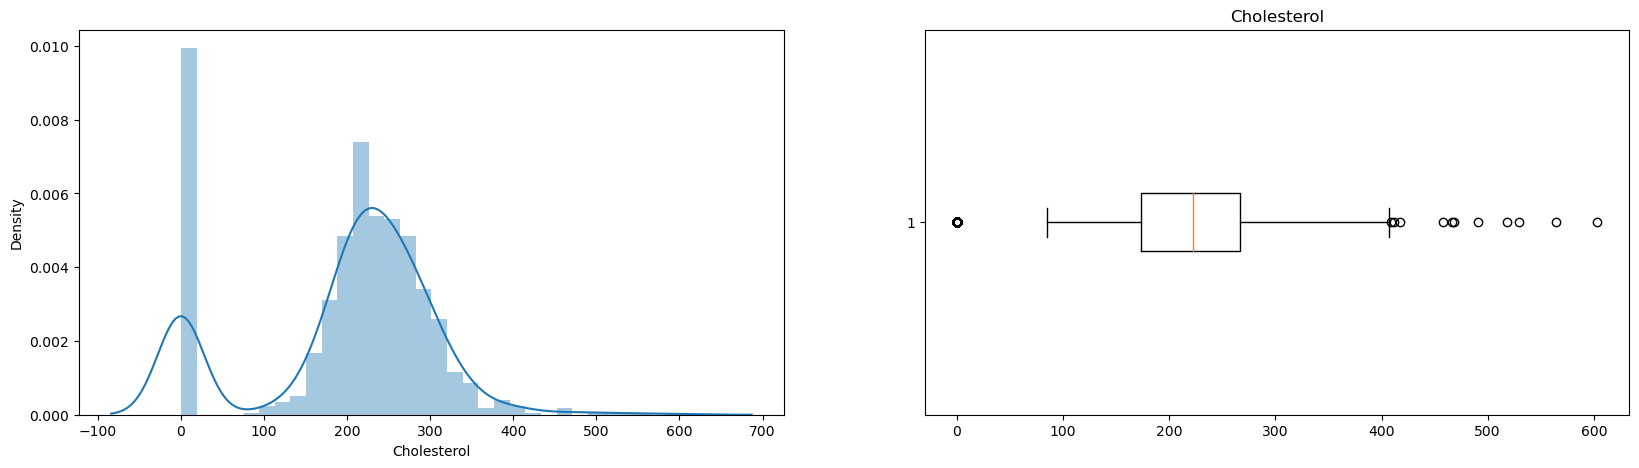

In [21]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot(df['Cholesterol'])

plt.subplot(1,2,2)
plt.boxplot(df['Cholesterol'], vert=False)
plt.title('Cholesterol')

plt.show()

In [22]:
df['MaxHR'].mode()

0    150
Name: MaxHR, dtype: int64

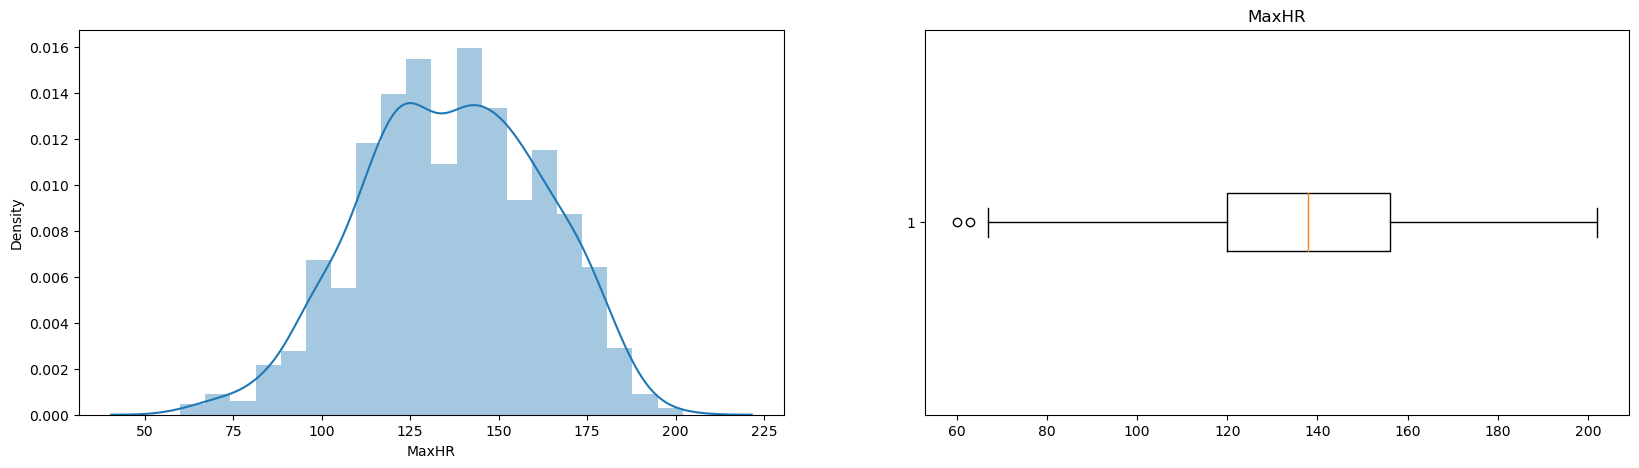

In [23]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot(df['MaxHR'])

plt.subplot(1,2,2)
plt.boxplot(df['MaxHR'], vert=False)
plt.title('MaxHR')

plt.show()

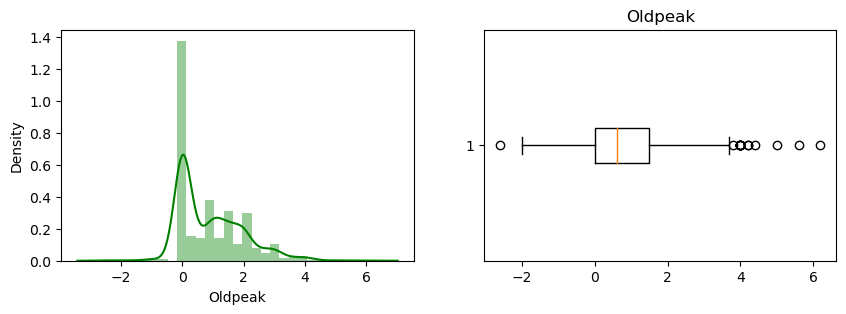

In [24]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
sns.distplot(df['Oldpeak'], color='g')

plt.subplot(1,2,2)
plt.boxplot(df['Oldpeak'], vert=False)
plt.title('Oldpeak')

plt.show()

**BiVariate Analysis**

In [25]:
sex = pd.crosstab(df['Sex'], df['HeartDisease'], normalize=True)
sex

HeartDisease,0,1
Sex,,
F,0.155773,0.054466
M,0.290850,0.498911


<Figure size 400x300 with 0 Axes>

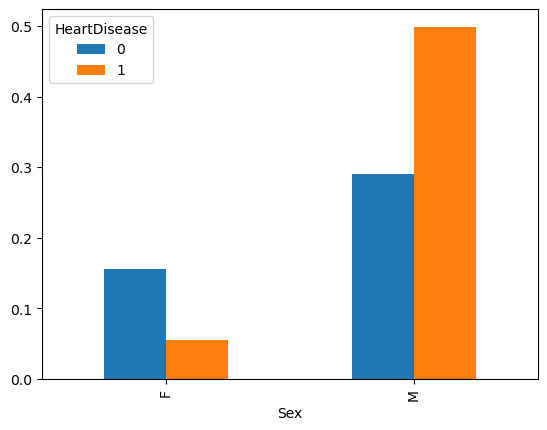

In [26]:
plt.figure(figsize=(4,3))
pd.crosstab(df['Sex'], df['HeartDisease'], normalize=True).plot.bar();
plt.show()

- from above it can be seen that only about 5% Female are prone to Heart Heart failure while about 50% of Male are prone to Heart Attack

In [27]:
ChestPainType = pd.crosstab(df['ChestPainType'], df['HeartDisease'], normalize=True)
ChestPainType

HeartDisease,0,1
ChestPainType,,
ASY,0.113290,0.427015
ATA,0.162309,0.026144
NAP,0.142702,0.078431
TA,0.028322,0.021786


<Figure size 400x300 with 0 Axes>

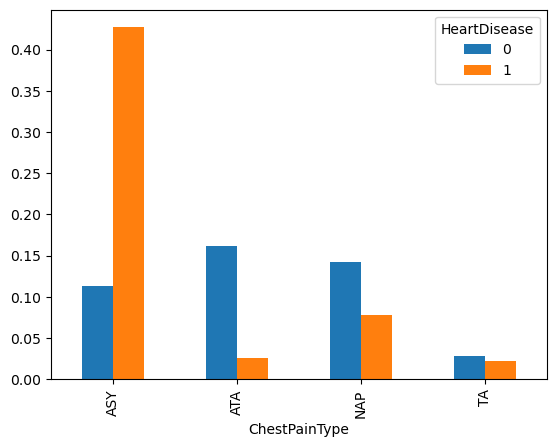

In [28]:
plt.figure(figsize=(4,3))
pd.crosstab(df['ChestPainType'], df['HeartDisease'], normalize=True).plot.bar()
plt.show()

- About 42% patient, who is getting HeartAttack are Asymtotic.

In [29]:
RestingECG = pd.crosstab(df['RestingECG'], df['HeartDisease'], normalize=True)
RestingECG

HeartDisease,0,1
RestingECG,,
LVH,0.089325,0.115468
Normal,0.290850,0.310458
ST,0.066449,0.127451


<Figure size 2500x500 with 0 Axes>

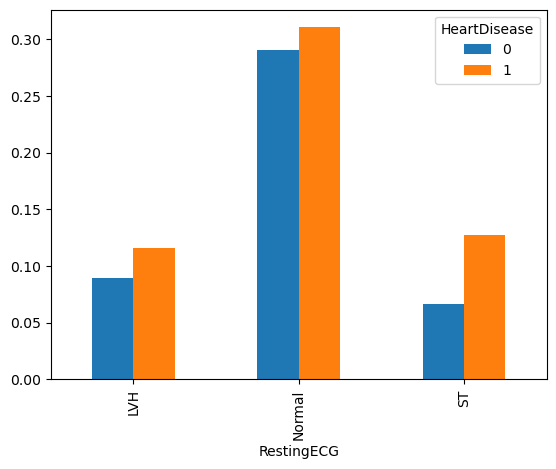

In [30]:
plt.figure(figsize=(25,5))
pd.crosstab(df['RestingECG'], df['HeartDisease'], normalize=True).plot.bar();

In [31]:
ExerciseAngina = pd.crosstab(df['ExerciseAngina'], df['HeartDisease'], normalize=True)
ExerciseAngina

HeartDisease,0,1
ExerciseAngina,,
N,0.386710,0.209150
Y,0.059913,0.344227


<Figure size 2500x500 with 0 Axes>

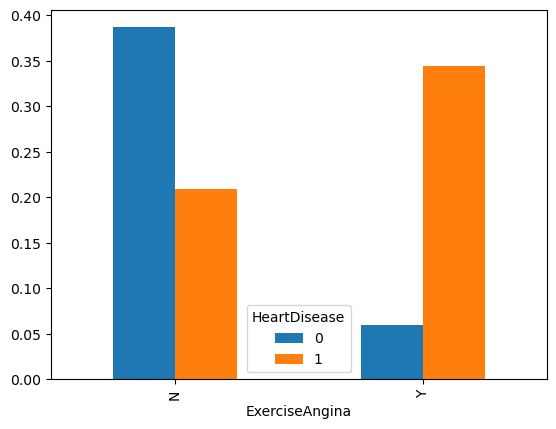

In [32]:
plt.figure(figsize=(25,5))
pd.crosstab(df['ExerciseAngina'], df['HeartDisease'], normalize=True).plot.bar()
plt.show()

In [33]:
ST_Slope = pd.crosstab(df['ST_Slope'], df['HeartDisease'], normalize=True)
ST_Slope

HeartDisease,0,1
ST_Slope,,
Down,0.015251,0.053377
Flat,0.086057,0.415033
Up,0.345316,0.084967


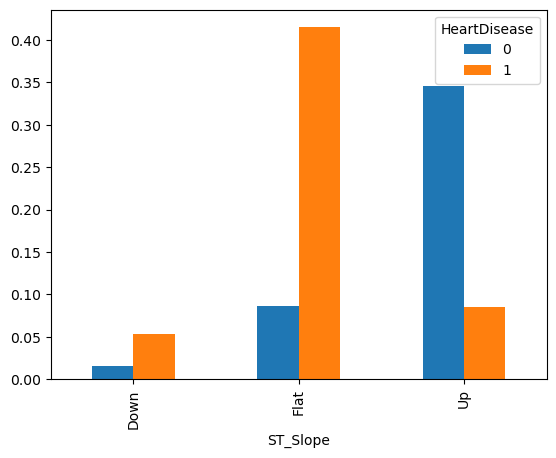

In [34]:
pd.crosstab(df['ST_Slope'], df['HeartDisease'], normalize=True).plot.bar()
plt.show()

- About 41% of people with flat ST_Slope are more prone to HeartFailure

In [35]:
FastingBS = pd.crosstab(df['FastingBS'], df['HeartDisease'], normalize=True)
FastingBS

HeartDisease,0,1
FastingBS,,
0,0.398693,0.368192
1,0.047930,0.185185


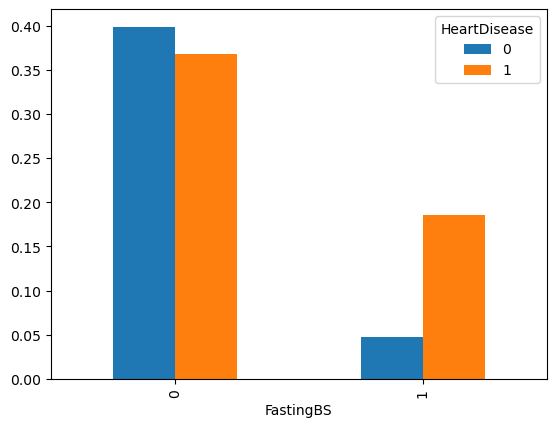

In [36]:
pd.crosstab(df['FastingBS'], df['HeartDisease'], normalize=True).plot.bar()
plt.show()

In [37]:
df.groupby(['HeartDisease','Sex'])[['Age']].agg(['mean', 'min', 'max'])

Age        
                       mean min max
HeartDisease Sex                   
0            F    51.202797  30  76
             M    50.202247  28  75
1            F    56.180000  33  73
             M    55.868996  31  77

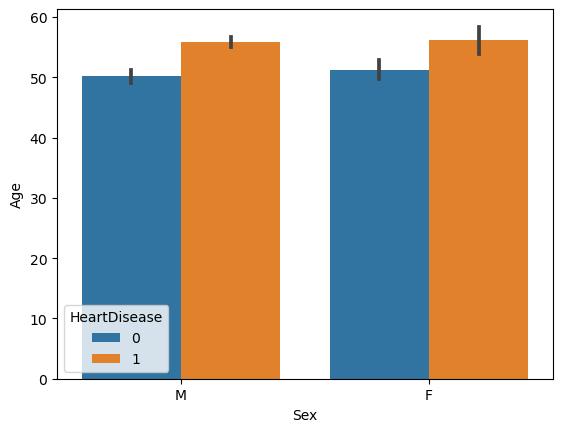

In [38]:
sns.barplot(x='Sex', y='Age',data=df, hue='HeartDisease')
plt.show()

- Age of patient having heartAttack are almost same for both Male and Female.

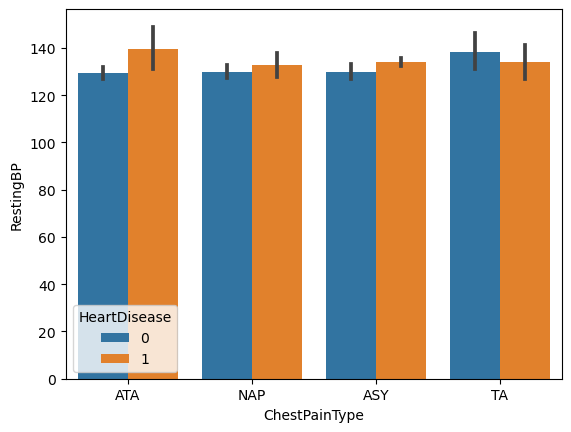

In [39]:
sns.barplot(x='ChestPainType', y='RestingBP',data=df, hue='HeartDisease')
plt.show()

In [40]:
df.groupby(['HeartDisease','Sex'])[['RestingBP','Cholesterol','MaxHR','Oldpeak']].mean()

RestingBP  Cholesterol       MaxHR   Oldpeak
HeartDisease Sex                                               
0            F    128.790210   247.440559  149.048951  0.435664
             M    130.925094   216.239700  147.670412  0.393258
1            F    142.000000   223.340000  137.820000  1.336000
             M    133.331878   170.766376  126.545852  1.267467

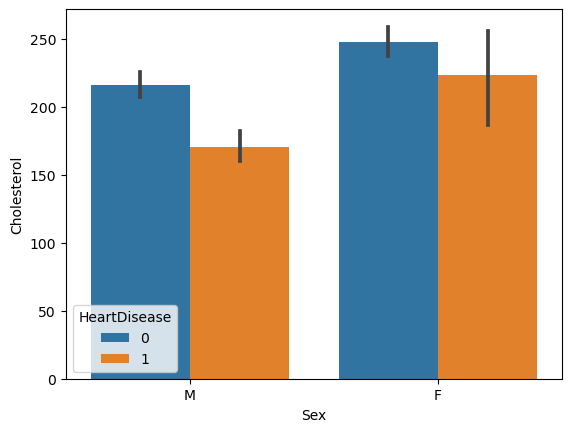

In [41]:
sns.barplot(x='Sex', y='Cholesterol',data=df, hue='HeartDisease')
plt.show()

In [42]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

- We can see that, Female with higher Cholesterol are more prone to HeartAttack.

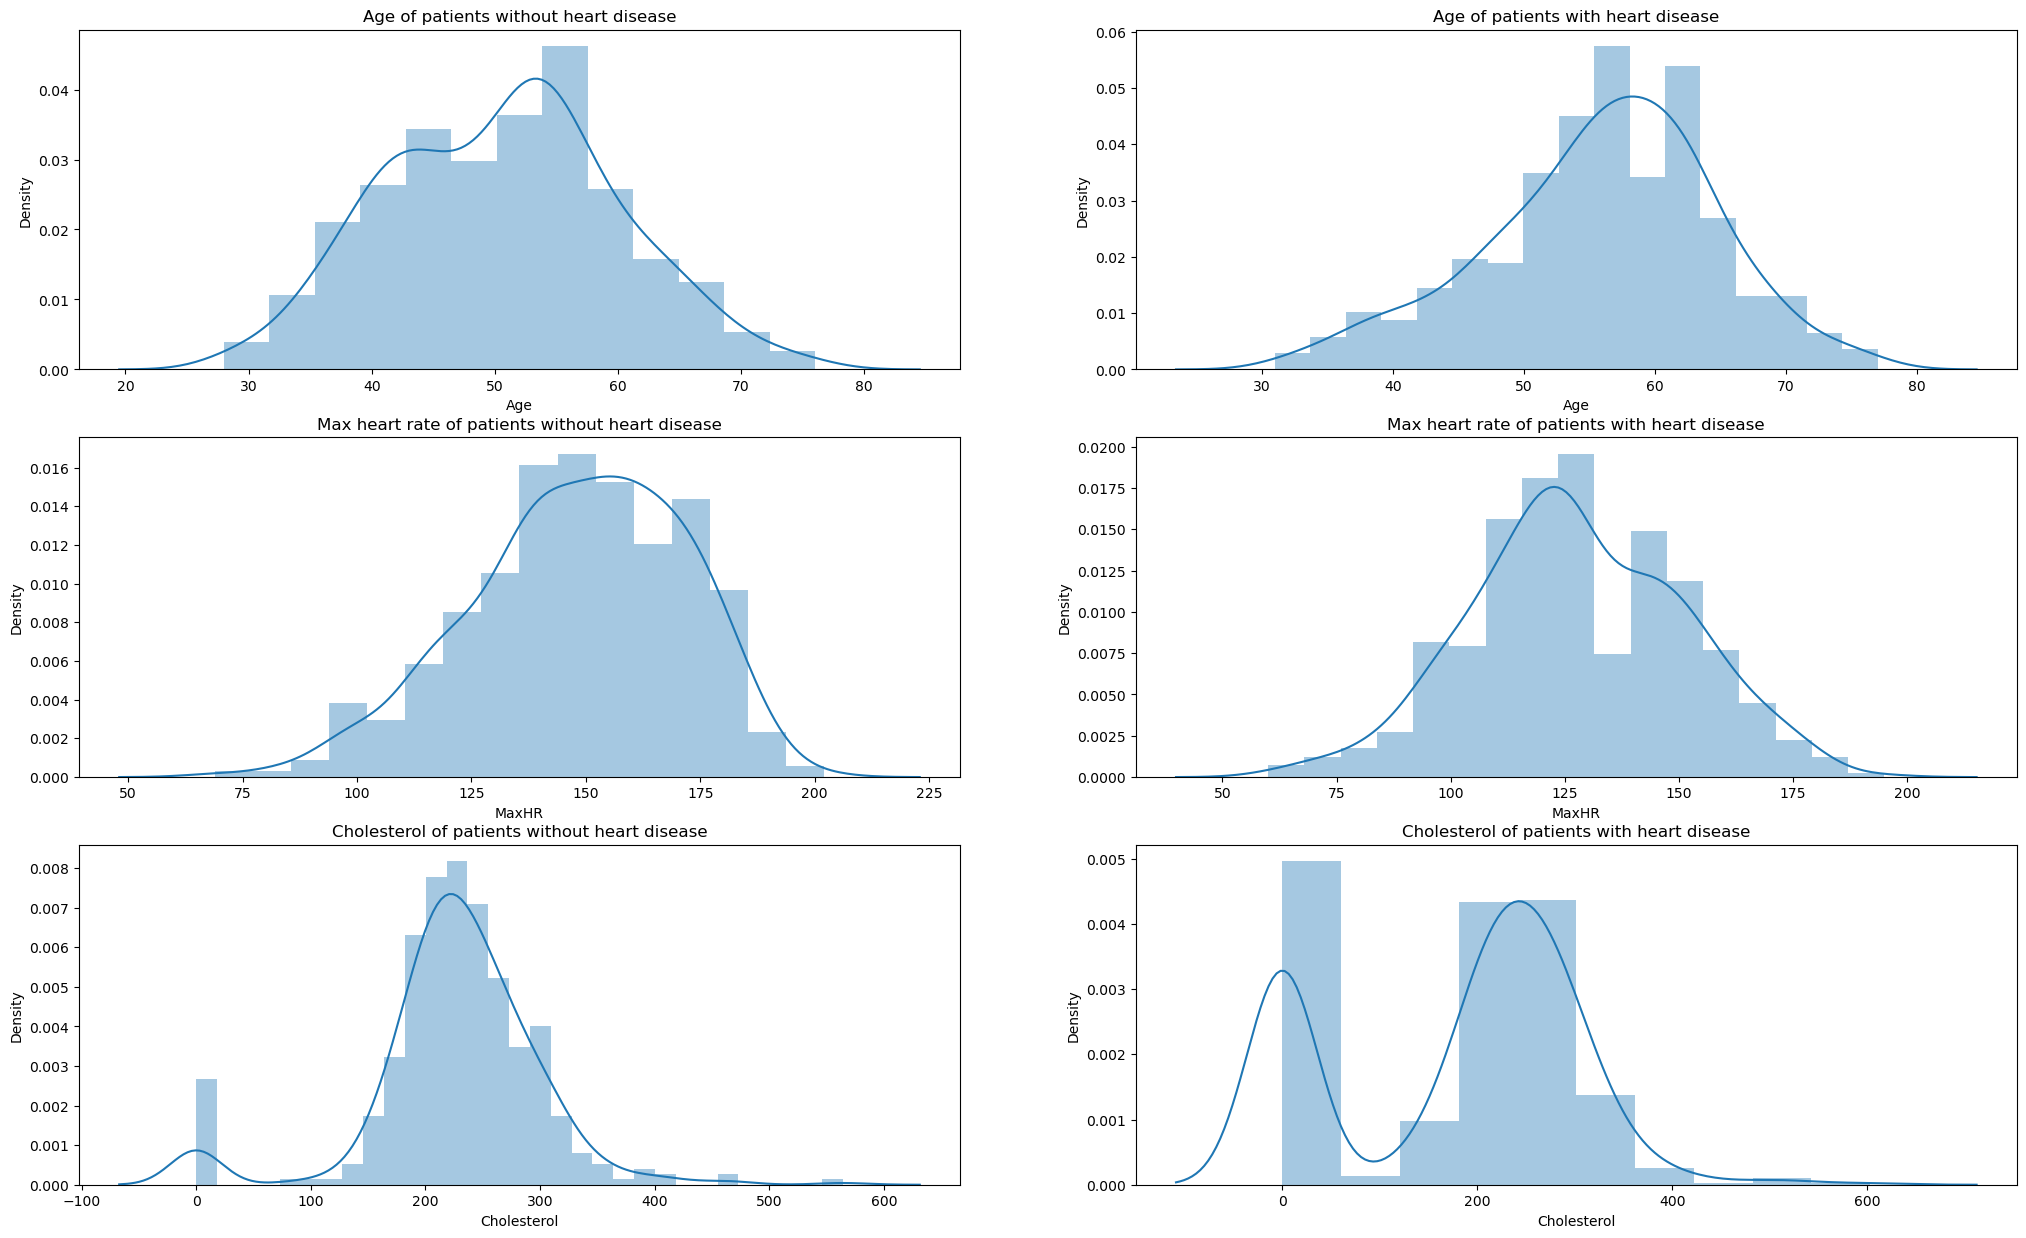

In [43]:
# create four distplots
plt.figure(figsize=(25,15))
plt.subplot(3,2,1)
sns.distplot(df[df['HeartDisease']==0].Age)
plt.title('Age of patients without heart disease')
plt.subplot(3,2,2)
sns.distplot(df[df['HeartDisease']==1].Age)
plt.title('Age of patients with heart disease')
plt.subplot(3,2,3)
sns.distplot(df[df['HeartDisease']==0].MaxHR )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(3,2,4)
sns.distplot(df[df['HeartDisease']==1].MaxHR)
plt.title('Max heart rate of patients with heart disease')

plt.subplot(3,2,5)
sns.distplot(df[df['HeartDisease']==0].Cholesterol)
plt.title('Cholesterol of patients without heart disease')
plt.subplot(3,2,6)
sns.distplot(df[df['HeartDisease']==1].Cholesterol)
plt.title('Cholesterol of patients with heart disease')
plt.show()

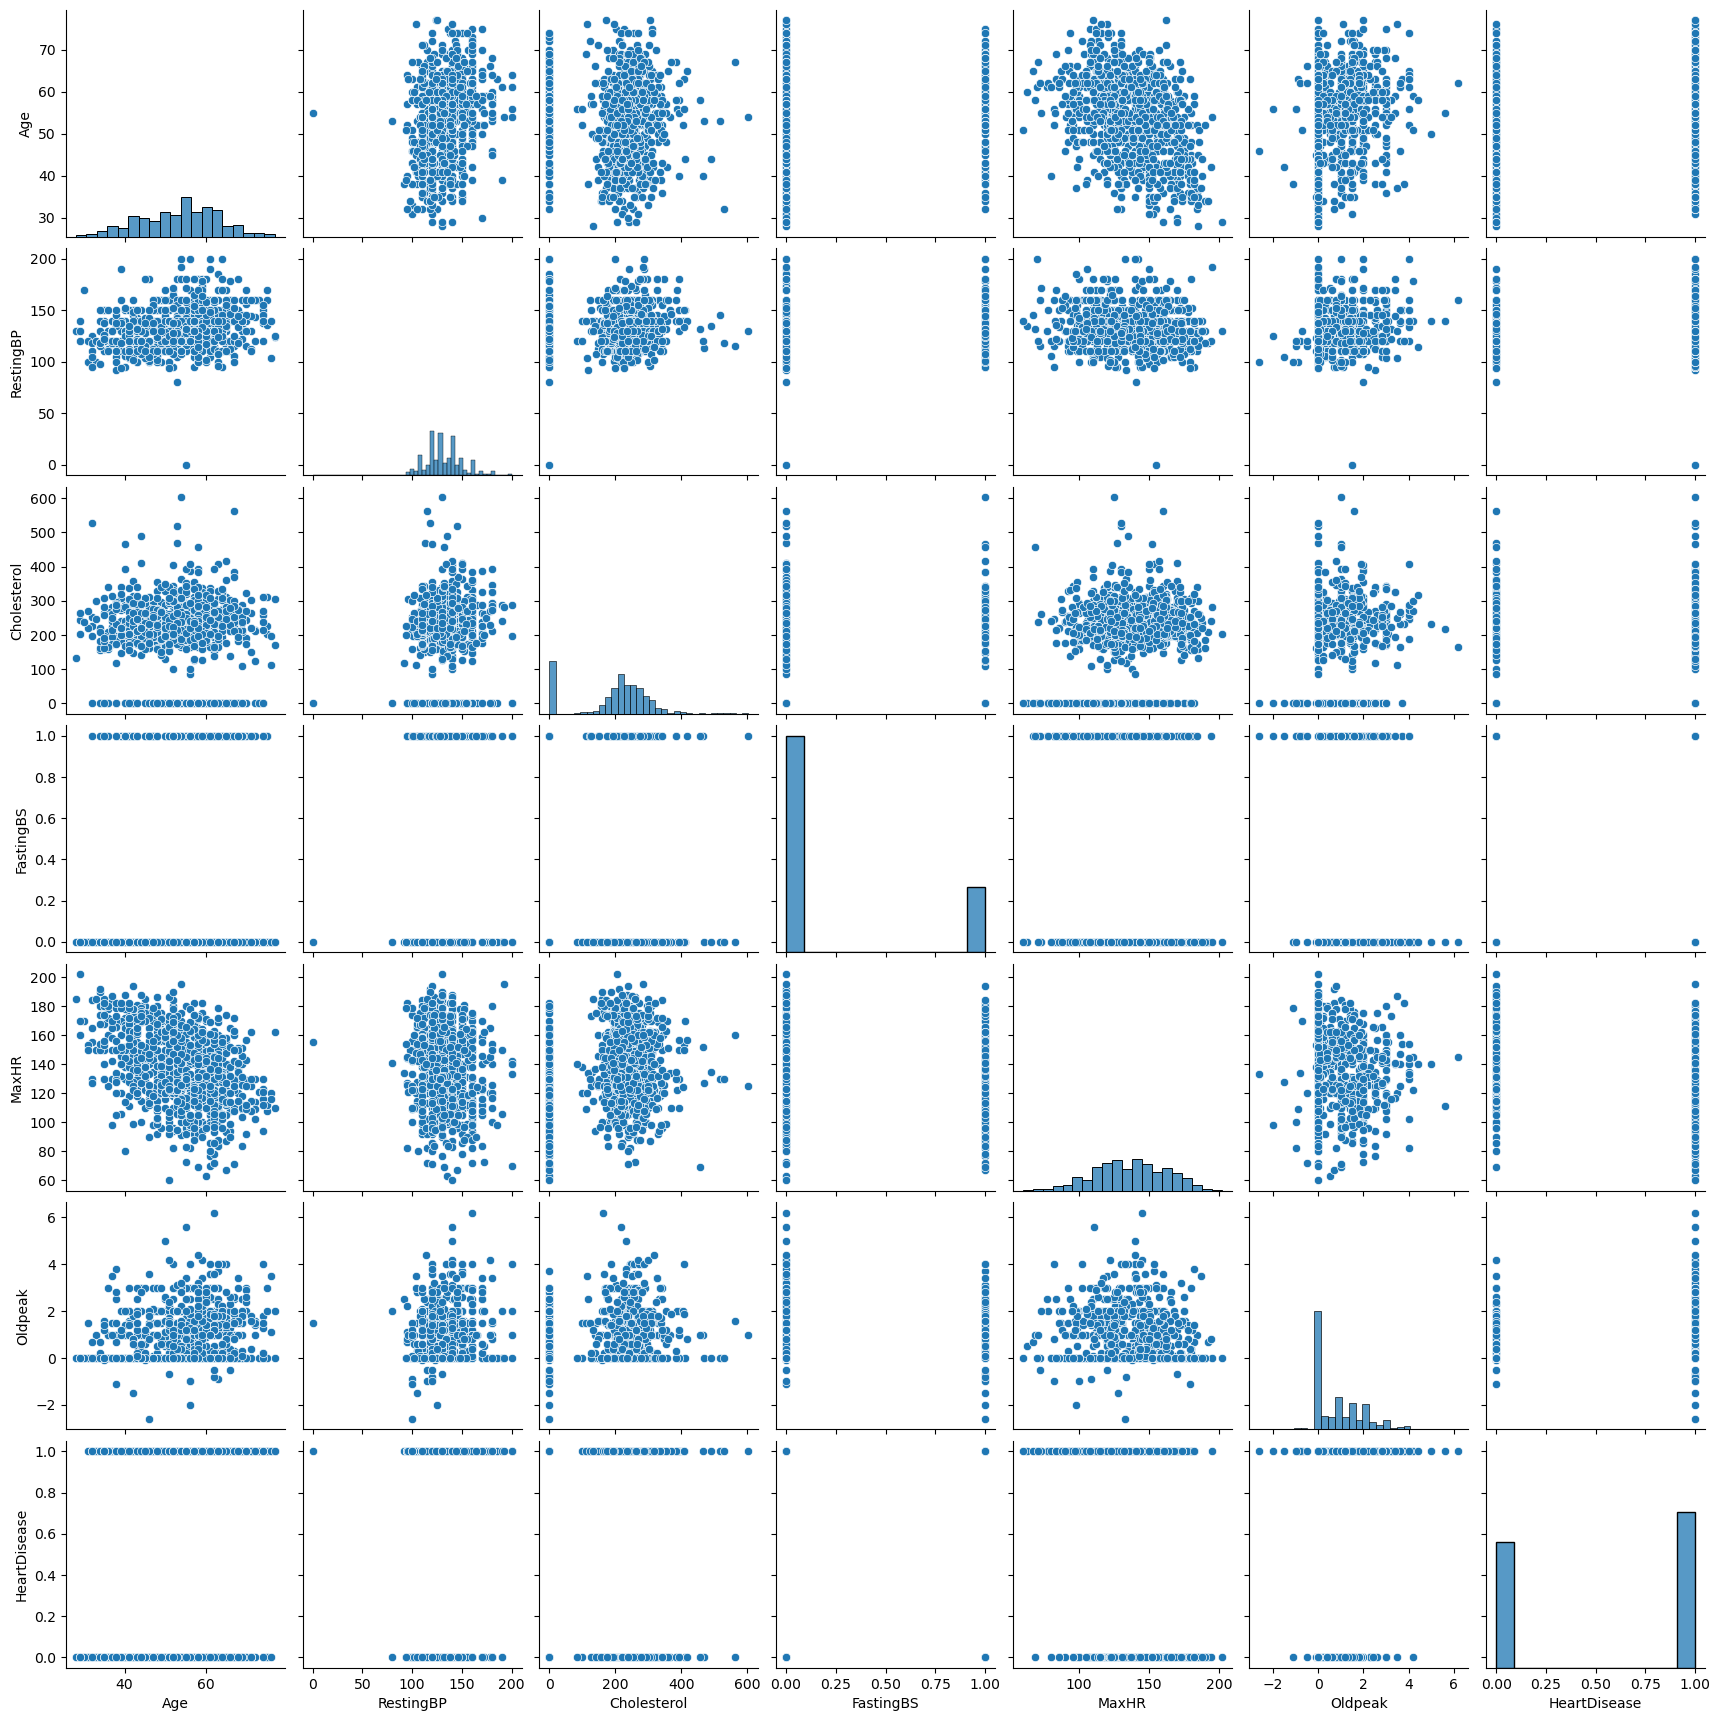

In [44]:
sns.pairplot(df)

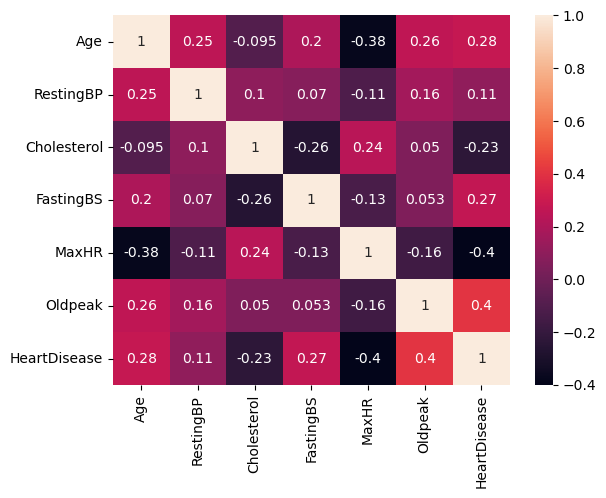

In [45]:
sns.heatmap(df.corr(), annot=True)
plt.show()

- From Heatmap we can see that, Age, FastingBS, Oldpeak are positively correlated with the HeartDisease.

In [46]:
df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


**X & y**

In [47]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [48]:
X = pd.get_dummies(X, drop_first=True)

In [49]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,1,0,1,0,1,0,0,0,1


In [50]:
X.shape

(918, 15)

### Feature Selection

In [51]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X, y)
mutual_info

array([0.01239234, 0.02750791, 0.06761619, 0.0362696 , 0.09048254,
       0.11275551, 0.05352215, 0.10871126, 0.        , 0.01615132,
       0.02039575, 0.        , 0.11424233, 0.18626827, 0.20980984])

In [52]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

ST_Slope_Up          0.209810
ST_Slope_Flat        0.186268
ExerciseAngina_Y     0.114242
Oldpeak              0.112756
ChestPainType_ATA    0.108711
MaxHR                0.090483
Cholesterol          0.067616
Sex_M                0.053522
FastingBS            0.036270
RestingBP            0.027508
RestingECG_Normal    0.020396
ChestPainType_TA     0.016151
Age                  0.012392
ChestPainType_NAP    0.000000
RestingECG_ST        0.000000
dtype: float64

- Since ResrtingBP and FastingBS are giving no information, so we will drop it.

In [53]:
X = X.drop(columns=['RestingBP','FastingBS'], axis=1)

In [54]:
### Splitting the dataset into trainingset and test_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [55]:
print(X_train.shape, X_test.shape)

(734, 13) (184, 13)


In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Modelling
**Initializing the Artificial Neural Network**

In [60]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [61]:
ann = Sequential()

## Adding i/p layer + 1st Hidden layer
ann.add(Dense(input_dim= 13, units =7, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dropout(rate=0.3))

## Adding the 2nd Hidden Layer
ann.add(Dense(units =7, kernel_initializer = 'uniform', activation = 'relu'))
ann.add(Dropout(rate=0.3))

## Adding the output Layer
ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

## Compling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [62]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.11.0


**Training the ANN on the Training Set**

**Early Stopping**
- Stop training when a monitored metric has stopped improving.

In [60]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=5,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False)

In [63]:
model = ann.fit(X_train, y_train, epochs = 100, batch_size= 32,validation_split=0.20)

Epoch 1/100
19/19 [==============================] - 2s 22ms/step - loss: 0.6929 - accuracy: 0.5520 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.5554 - val_loss: 0.6923 - val_accuracy: 0.5102
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6903 - accuracy: 0.5809 - val_loss: 0.6896 - val_accuracy: 0.5374
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6850 - accuracy: 0.7325 - val_loss: 0.6804 - val_accuracy: 0.8299
Epoch 5/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6726 - accuracy: 0.8262 - val_loss: 0.6604 - val_accuracy: 0.8435
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.8501 - val_loss: 0.6289 - val_accuracy: 0.8367
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6213 - accuracy: 0.8484 - val_loss: 0.5937 - val_accuracy: 0.8435
Epoch 8/100


Epoch 59/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3943 - accuracy: 0.8620 - val_loss: 0.3998 - val_accuracy: 0.8571
Epoch 60/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3759 - accuracy: 0.8773 - val_loss: 0.3994 - val_accuracy: 0.8639
Epoch 61/100
19/19 [==============================] - 0s 5ms/step - loss: 0.3994 - accuracy: 0.8484 - val_loss: 0.3984 - val_accuracy: 0.8571
Epoch 62/100
19/19 [==============================] - 0s 6ms/step - loss: 0.3815 - accuracy: 0.8671 - val_loss: 0.3971 - val_accuracy: 0.8571
Epoch 63/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3749 - accuracy: 0.8842 - val_loss: 0.3975 - val_accuracy: 0.8639
Epoch 64/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3684 - accuracy: 0.8739 - val_loss: 0.3969 - val_accuracy: 0.8639
Epoch 65/100
19/19 [==============================] - 0s 5ms/step - loss: 0.3708 - accuracy: 0.8756 - val_loss: 0.3962 - val_accuracy: 0.8639
Epoch 

In [69]:
model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

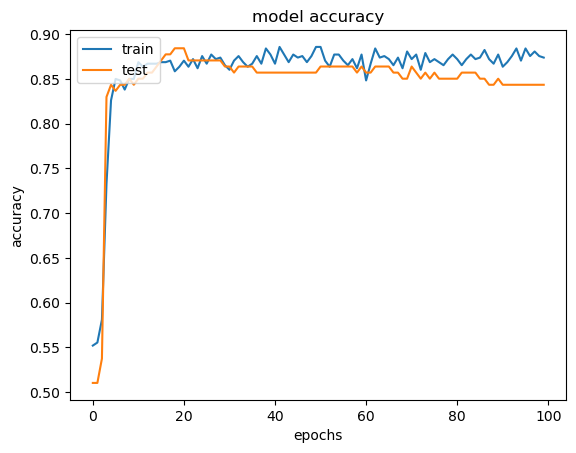

In [72]:
### Summerize history for accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

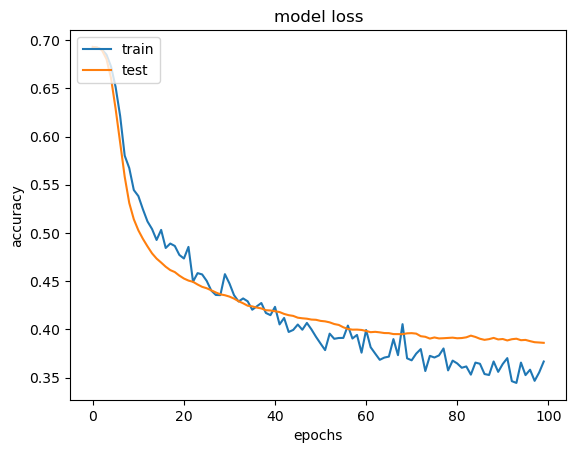

In [73]:
### Summerize history for accuracy
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [89]:
### Get the weights

ann.get_weights()

[array([[-0.21141122,  0.1397897 ,  0.0745457 , -0.20592116, -0.13888162,
         -0.09192124, -0.22939008],
        [ 0.23885897, -0.21192914, -0.35362408, -0.00736784,  0.23762494,
          0.00169541,  0.22895779],
        [-0.10648315,  0.1582987 ,  0.05562437, -0.12949698, -0.12348355,
          0.04795831, -0.06441021],
        [-0.16440287,  0.16440015,  0.1982229 , -0.0856325 , -0.1484545 ,
         -0.09182858, -0.16933241],
        [-0.2674036 ,  0.20949143,  0.04587311,  0.14382485, -0.31744686,
          0.2098455 , -0.16089158],
        [ 0.4002154 , -0.13782543, -0.21105057, -0.05712991,  0.36238253,
         -0.10897441,  0.41908488],
        [ 0.30914262, -0.32243535, -0.1776577 , -0.04215495,  0.310205  ,
         -0.13213567,  0.29394147],
        [ 0.09434897, -0.0249385 , -0.15609977, -0.1268113 ,  0.06248679,
         -0.11425974, -0.08886182],
        [ 0.05633707, -0.21605128, -0.030694  ,  0.23262072,  0.10376903,
          0.01333313,  0.11682242],
        [ 

### Prediction and Evaluating the Model

In [74]:
### Predictions
ypred_train = ann.predict(X_train)
ypred_test = ann.predict(X_test)

ypred_train = (ypred_train >= 0.5)
ypred_test = (ypred_test >= 0.5)

6/6 [==============================] - 0s 2ms/step


In [75]:
print(ypred_train >= 0.5) # comapre ypred_train with threshold value 0.5 and a/c to that it will allocate the class 0 and 1

[[ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 

In [76]:
## Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score

print("Train Accuracy:", accuracy_score(y_train, ypred_train))
print("Test Accuracy:", accuracy_score(y_test, ypred_test))

Train Accuracy: 0.8828337874659401
Test Accuracy: 0.8260869565217391


In [81]:
print("Train Accuracy:", accuracy_score(y_train, ypred_train))
print("Test Accuracy:", accuracy_score(y_test, ypred_test))
#print("Cross-Validation Score:", accuracies.mean())

Train Accuracy: 0.8828337874659401
Test Accuracy: 0.8260869565217391


In [84]:
cm = confusion_matrix(y_test, ypred_test)

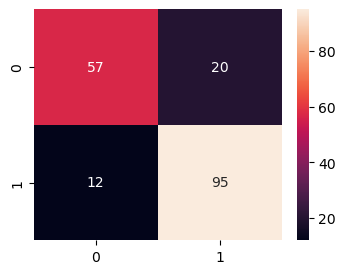

In [88]:
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot=True);

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        77
           1       0.83      0.89      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.81      0.82       184
weighted avg       0.83      0.83      0.82       184

